<a href="https://colab.research.google.com/github/MerveKaragulTabas/ML-Machine-Learning-/blob/main/ML_1_(used_car_price_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [ ]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


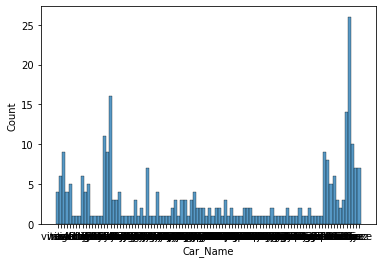

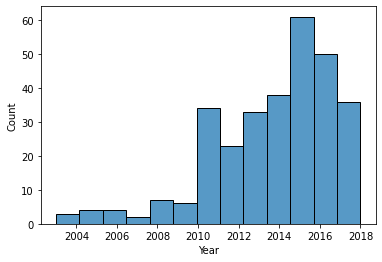

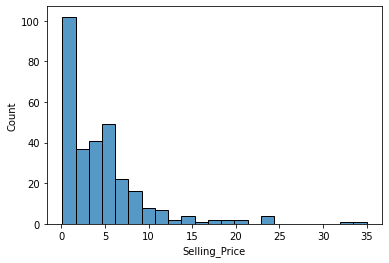

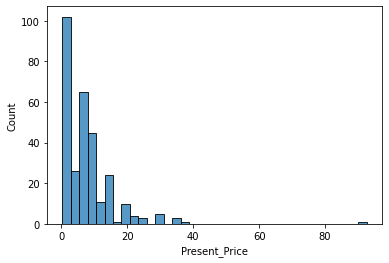

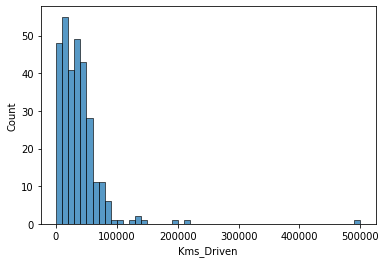

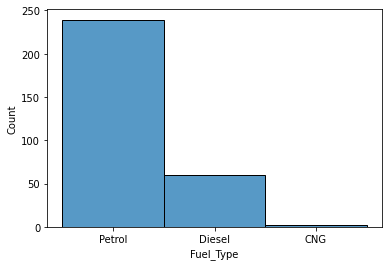

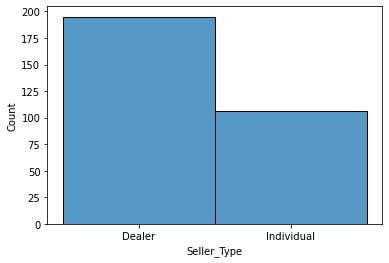

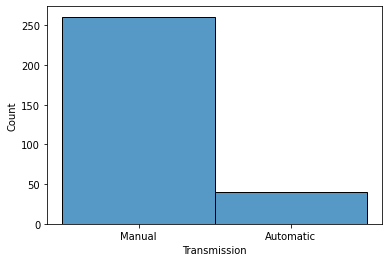

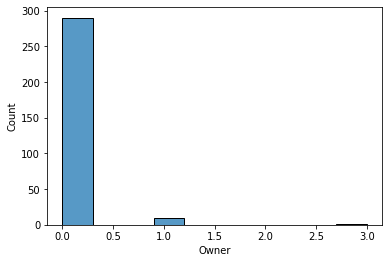

In [ ]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

# Data Preparation

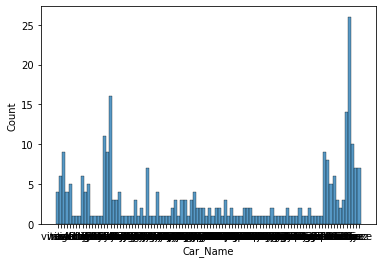

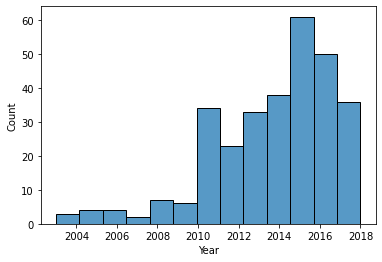

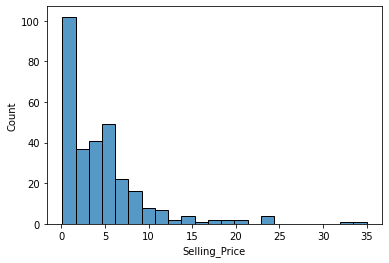

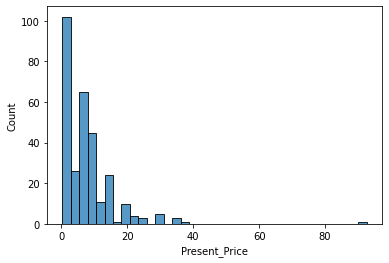

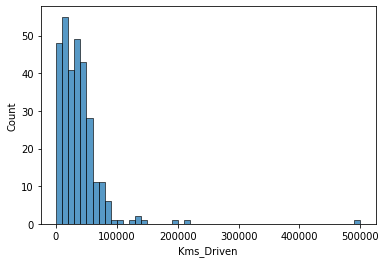

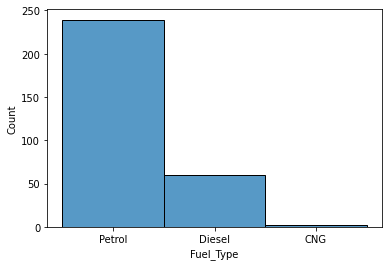

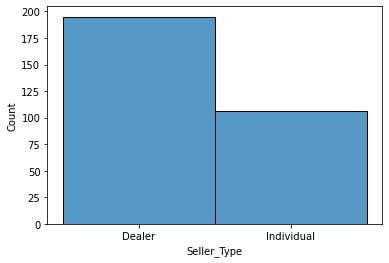

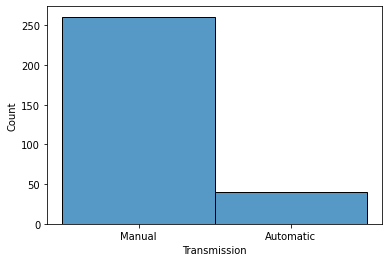

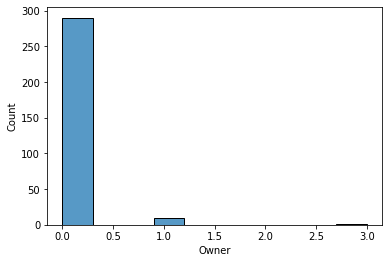

In [ ]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

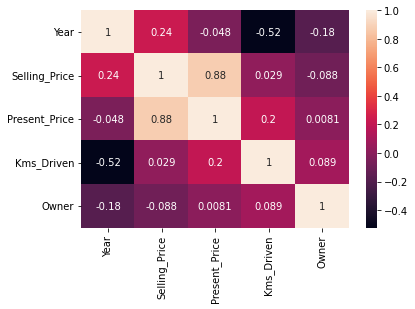

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df["vehicle_age"]=2021-df.Year

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df.Car_Name.value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Bajaj  ct 100          1
800                    1
TVS Wego               1
Hyosung GT250R         1
Hero  Ignitor Disc     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [ ]:
df=pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [ ]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

### Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


##  Model Building (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True).fit(X_train,y_train)

# Interpret the model

In [ ]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [ ]:
print("Model intercept  : ", model.intercept_, "\n")
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  4.604429051576995 

Present_Price :  0.4452579698976289
Kms_Driven :  -1.870672975702182e-05
Owner :  -0.81357757765867
vehicle_age :  -0.3190477645588865
Fuel_Type_Diesel :  2.6192462729450945
Fuel_Type_Petrol :  0.6064868667913306
Seller_Type_Individual :  -1.2201674460429661
Transmission_Manual :  -1.0086828216162702


In [ ]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.445258
Kms_Driven,-0.000019
Owner,-0.813578
vehicle_age,-0.319048
Fuel_Type_Diesel,2.619246
Fuel_Type_Petrol,0.606487
Seller_Type_Individual,-1.220167
Transmission_Manual,-1.008683


# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [ ]:
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

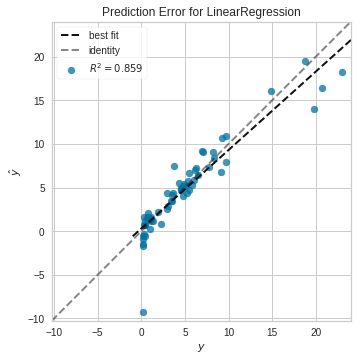

In [ ]:
from yellowbrick.regressor import PredictionError
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_sample = results
result_sample

,Actual,Predicted
67,9.25,10.707296
99,9.65,10.875207
266,3.65,4.430969
222,6.00,5.913378
24,2.90,2.549419
...,...,...
25,3.00,2.859458
181,0.30,0.665214
194,0.20,-1.750474
127,0.75,1.612086


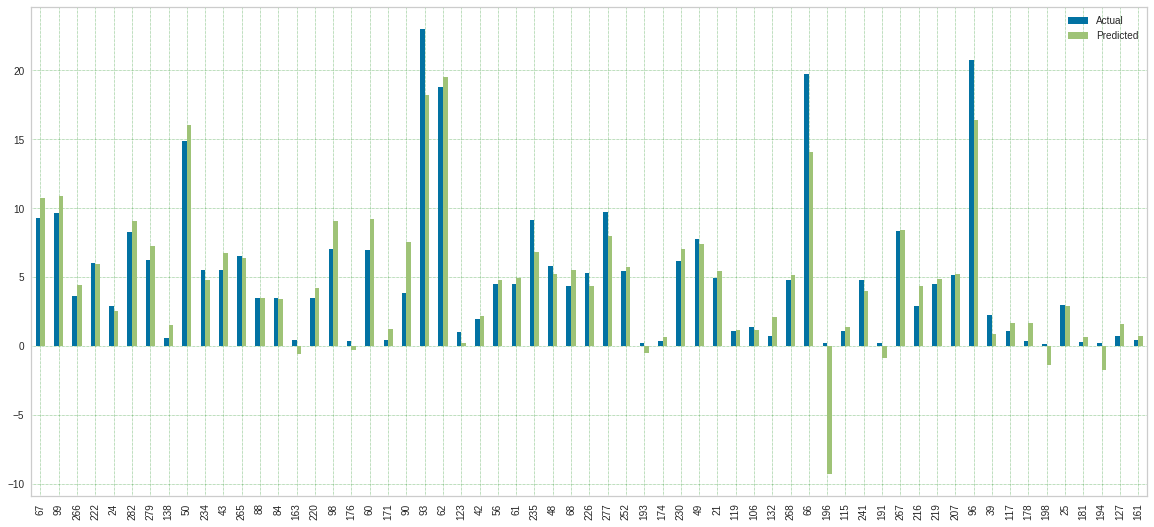

In [ ]:
result_sample.plot(kind='bar',figsize=(20,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

# Regularization

# Ridge

In [ ]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE {:25}'.format(rmse))
    print("MAE {:26}".format(mae))
    print('R2 {:27}'.format(R2_score))

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[0.07780668, 0.28566118, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.14390984, 0.13516706, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.15680537, 0.20251765, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01246207, 0.12      , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00270915, 0.25647059, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.07379714, 0.05637176, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [ ]:
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE        1.9026594573849422
MAE         1.1854250171898175
R2          0.8651263662232391


In [ ]:
ridge_model.alpha

1.0

In [ ]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [ ]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [ ]:
ridgecv.alpha_

0.1

In [ ]:
alpha_space = np.linspace(0.01, 10, 100)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10)

In [ ]:
ridgecv.alpha_

0.21181818181818182

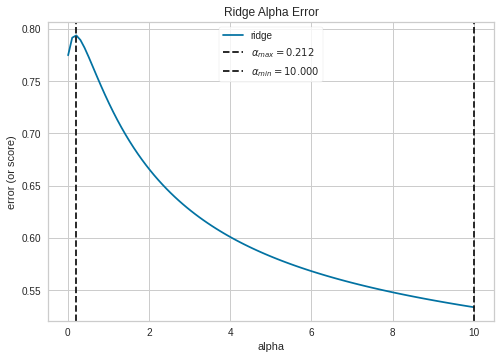

In [ ]:
from yellowbrick.regressor import ManualAlphaSelection
alpha_space = np.linspace(0.01, 10, 100)
visualizer = ManualAlphaSelection(Ridge(), alphas=alpha_space, cv=10)
visualizer.fit(X_train, y_train)
visualizer.show()

In [ ]:
y_pred=ridgecv.predict(X_test)

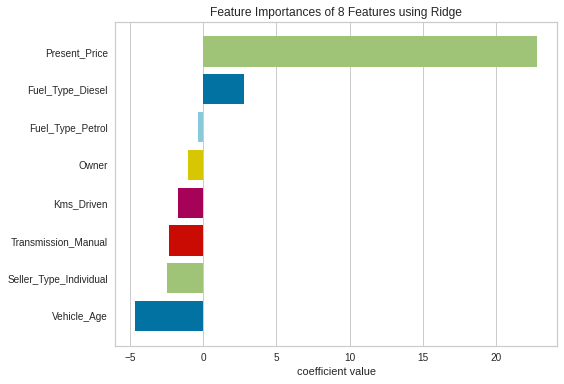

In [ ]:
from yellowbrick.model_selection import FeatureImportances
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE         4.844430603529284
MAE          3.198316612453815
R2         0.12563974476813833


In [ ]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [ ]:
y_pred=lasso_cv_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE        1.9323214066935646
MAE         1.1726681712627107
R2          0.8608882992084927


In [ ]:
lasso_cv_model.alpha_

0.001

In [ ]:
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

NameError: ignored

## Elastic-Net 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [ ]:
elastic_model.l1_ratio

0.5

In [ ]:
elastic_model.alpha

1.0

In [ ]:
y_train_pred = elastic_model.predict(X_train)
show_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
RMSE         4.556672537035124
MAE         2.9737637659724547
R2         0.18365441423272466


In [ ]:
y_test_pred = elastic_model.predict(X_test)
show_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
RMSE         4.658279048563928
MAE          3.054714362337027
R2          0.1915448500897866


In [ ]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,4.556673,4.658279
mae,2.973764,3.054714
mse,20.763265,21.699564
R2,0.183654,0.191545


In [ ]:
enet_cv  = ElasticNetCV(alphas = 10**np.linspace(10,-2,100)*0.5, l1_ratio=[.1,.2,.3,.5,.7,.8,.9,1], 
                        max_iter=100000, cv = 10, normalize = True)

enet_cv.fit(X_train, y_train)
enet_cv.alpha_

enet_tuned = ElasticNet(alpha = enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_).fit(X_train, y_train)

y_train_pred = enet_tuned.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_score_train = r2_score(y_train, y_train_pred)

y_test_pred = enet_tuned.predict(X_test)
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_score_test = r2_score(y_test, y_test_pred)


print('Optimal lambda: ', enet_cv.alpha_)
print("Optimal l1_ratio", enet_cv.l1_ratio_)

print()

print("Train Results")
print('rmse:', rmse_train)
print('r2: ', r2_score_train)

print()

print("Test Results")
print('rmse:', rmse_test)
print('r2: ', r2_score_test)

Optimal lambda:  0.005
Optimal l1_ratio 0.9

Train Results
rmse: 1.7792746125433059
r2:  0.8755300903741501

Test Results
rmse: 1.8136459931297642
r2:  0.8774509436017539


In [ ]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae" : mean_absolute_error(y_test, y_test_pred),
    "mse" : mean_squared_error(y_test, y_test_pred),
    "R2" : r2_score(y_test, y_test_pred)}}
ecvs = pd.DataFrame(elastic_cv_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=100000)

In [ ]:
param_grid ={"alpha":[0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.95}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002327,0.000359,0.000791,0.000042,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.358338,-1.579239,-2.652723,-2.505880,-2.365599,-2.095531,-4.458016,-1.970121,-1.753473,-4.286782,-2.602570,0.939796,14
1,0.001754,0.000368,0.000497,0.000055,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.149865,-1.481102,-2.364189,-2.292595,-2.088488,-1.940098,-4.175131,-1.924213,-1.705817,-3.472532,-2.359403,0.788765,11
2,0.002227,0.000362,0.000761,0.000624,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-1.984463,-1.417909,-2.131644,-2.118570,-1.874917,-1.819774,-3.942071,-1.906619,-1.691525,-2.660403,-2.154790,0.670122,9
3,0.002179,0.000489,0.000665,0.000279,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.754747,-1.357504,-1.786920,-1.855842,-1.583434,-1.666893,-3.572391,-1.927520,-1.740842,-1.691797,-1.893789,0.578846,2
4,0.002238,0.000643,0.000580,0.000088,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.691840,-1.349651,-1.677567,-1.768556,-1.502503,-1.626775,-3.443639,-1.948983,-1.783699,-2.092504,-1.888572,0.554988,1
5,0.001948,0.000392,0.000560,0.000091,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-1.640071,-1.348857,-1.583740,-1.690657,-1.441261,-1.596723,-3.325038,-1.975212,-1.837199,-2.980241,-1.941900,0.633031,6
6,0.001979,0.000285,0.000492,0.000072,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-1.627215,-1.349726,-1.559613,-1.670042,-1.427241,-1.589853,-3.292882,-1.983374,-1.854112,-3.297483,-1.965154,0.687411,7
7,0.001887,0.000163,0.000469,0.000015,0.02,0.1,"{'alpha': 0.02, 'l1_ratio': 0.1}",-2.588684,-1.706222,-2.993424,-2.744486,-2.733051,-2.258891,-4.841619,-2.057284,-1.806896,-5.029287,-2.875985,1.104394,17
8,0.002147,0.000474,0.000544,0.000111,0.02,0.5,"{'alpha': 0.02, 'l1_ratio': 0.5}",-2.409288,-1.603521,-2.739080,-2.565381,-2.474191,-2.128016,-4.589877,-1.997587,-1.740275,-4.520688,-2.676790,0.999009,15
9,0.002072,0.000317,0.000581,0.000089,0.02,0.7,"{'alpha': 0.02, 'l1_ratio': 0.7}",-2.229483,-1.515404,-2.495136,-2.387981,-2.238417,-1.996769,-4.356206,-1.953451,-1.683067,-3.907065,-2.476298,0.881060,12


In [ ]:
ElasticNet(alpha=0.1, l1_ratio=0.1)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
y_test_pred = grid_model.predict(X_test)

In [ ]:
show_metrics(y_test, y_test_pred)

Model testing performance:
--------------------------
RMSE        1.7770543563621737
MAE         1.1067866972278728
R2          0.8823460927683366
